In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire

np.random.seed(4)

iris = acquire.get_iris_data()

iris.head()

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
 6   species_id      150 non-null    int64  
 7   species_name    150 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


In [7]:
X = iris[['sepal_width', 'petal_width']]

In [8]:
X

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


# Exercise 1

In [9]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
iris['cluster'] = kmeans.predict(X)

In [12]:

kmeans.cluster_centers_

array([[3.04166667, 2.05208333],
       [3.45102041, 0.24489796],
       [2.70754717, 1.30943396]])

In [13]:

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,sepal_width,petal_width
0,3.041667,2.052083
1,3.451020,0.244898
2,2.707547,1.309434


Text(0.5, 1.0, 'Visualizing Cluster Centers')

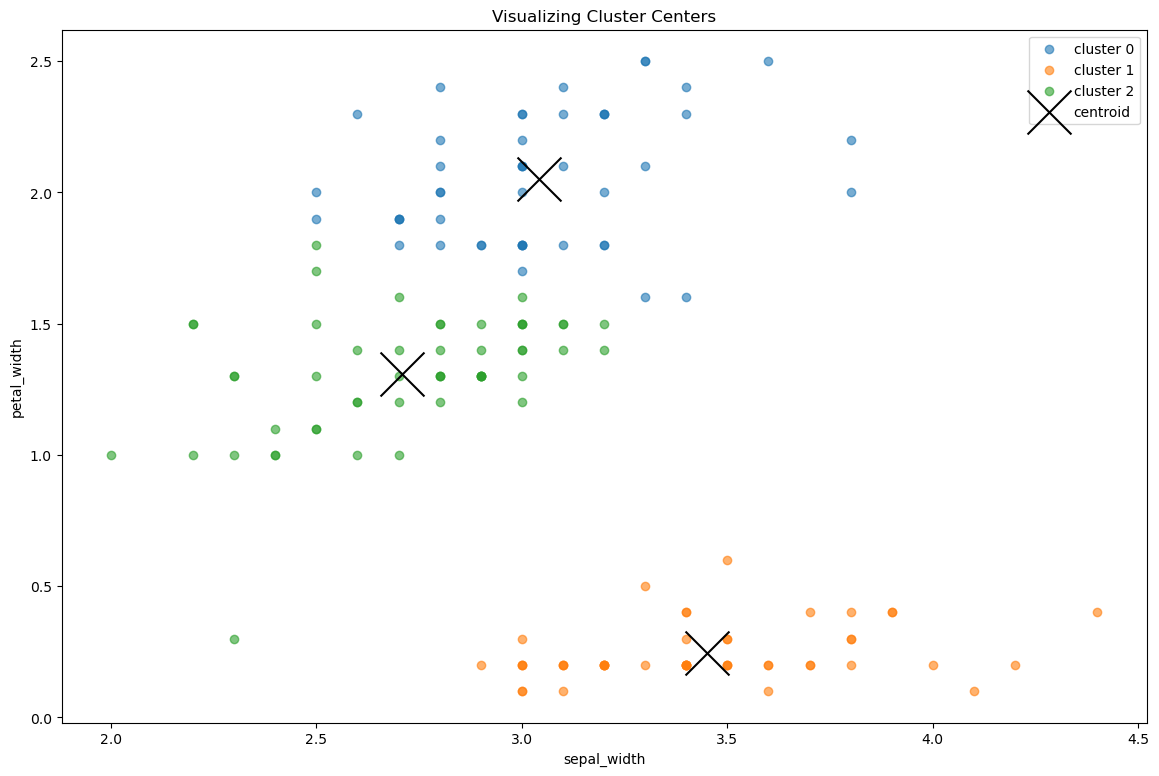

In [17]:
plt.figure(figsize = (14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label = 'cluster ' + str(cluster), alpha = .6)
centroids.plot.scatter(y = 'petal_width', x = 'sepal_width', c= 'black', marker = 'x', s=1000, ax=plt.gca(), label= 'centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

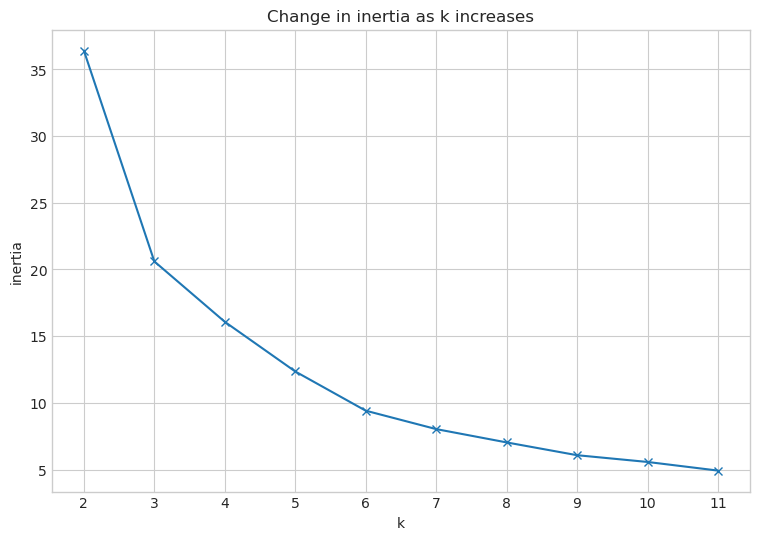

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6 ))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2,12)}).plot(marker='x')
    plt.xticks(range(2,12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

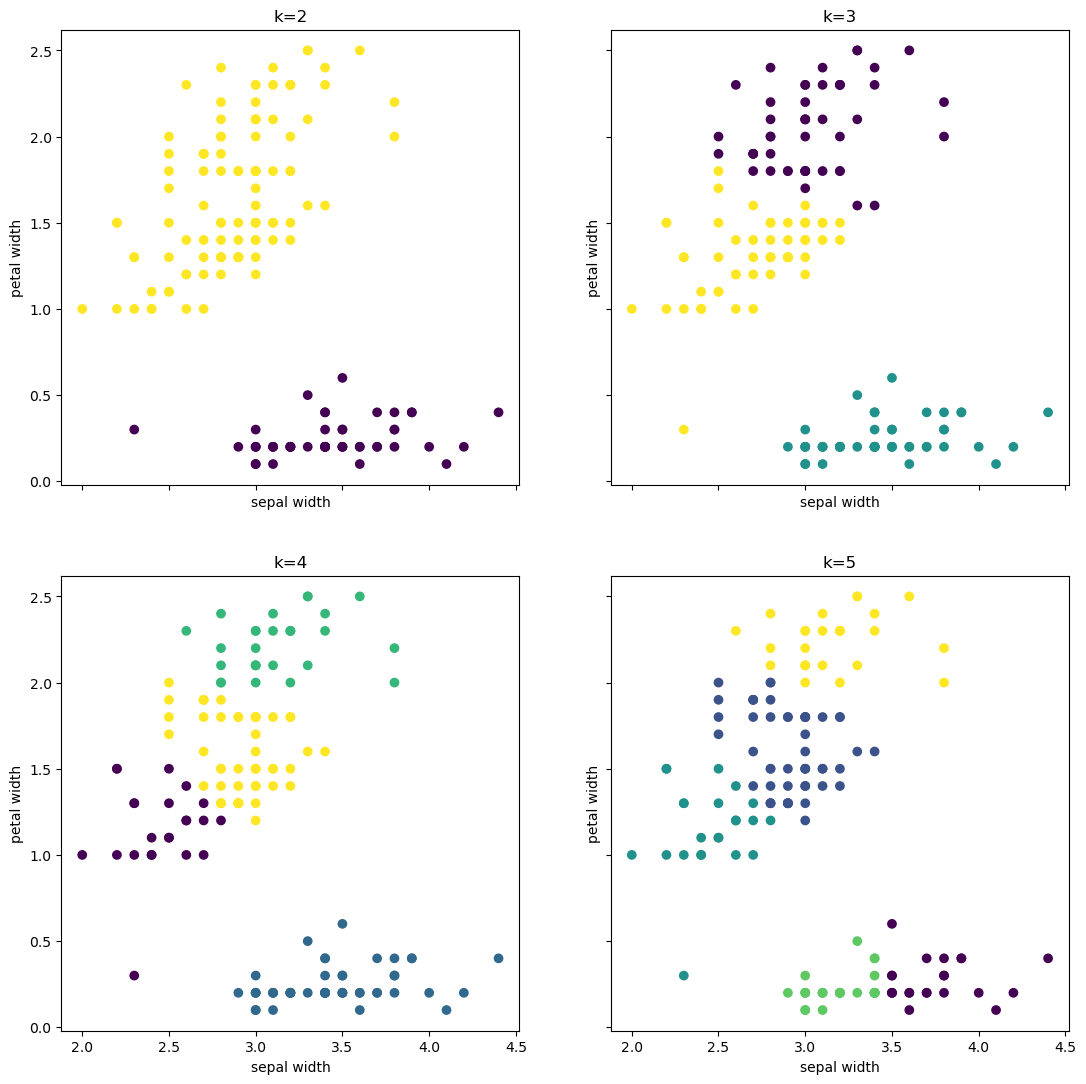

In [19]:
fig, axs = plt.subplots(2,2, figsize=(13,13), sharex = True, sharey = True)

for ax, k in zip(axs.ravel(), range(2,6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title = 'k={}'.format(k), xlabel='sepal width', ylabel = 'petal width')

# Exercise 1D

## Clustering with 3 features instead of 2

In [21]:
Y = iris[['sepal_length', 'sepal_width', 'petal_length']]

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(Y)
kmeans.predict(Y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [25]:
iris['cluster1'] = kmeans.predict(Y)
kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=Y.columns)
centroids

,sepal_length,sepal_width,petal_length
0,5.532143,2.635714,3.960714
1,5.006000,3.428000,1.462000
2,7.122727,3.113636,6.031818
3,6.292000,2.898000,4.940000


Text(0.5, 1.0, 'Visualizing Cluster Centers')

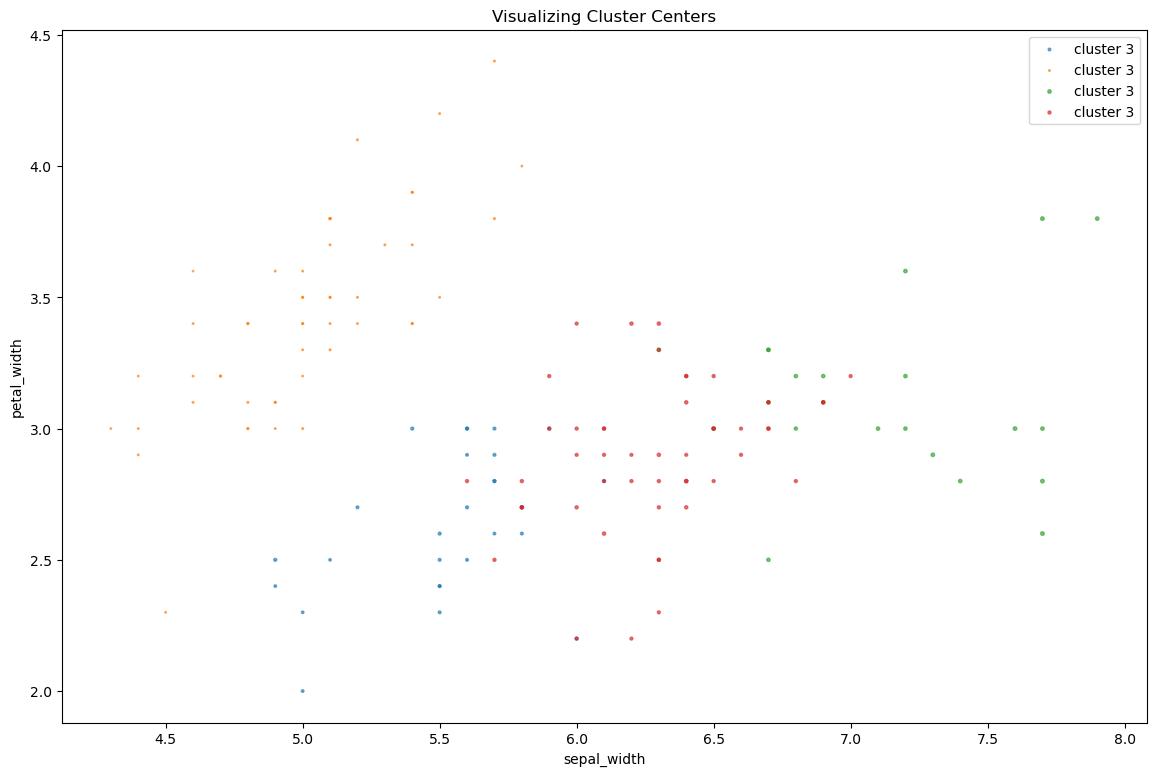

In [29]:
plt.figure(figsize = (14, 9))

for cluster1, subset in iris.groupby('cluster1'):
    plt.scatter(subset.sepal_length, subset.sepal_width, subset.petal_length, label = 'cluster ' + str(cluster), alpha = .6)

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

I don't think it is possible to have 3 features at the same time.